Saving dataset_path.zip to dataset_path.zip
['plastic', 'metal', 'organic']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3684 - loss: 1.0911 - val_accuracy: 0.0000e+00 - val_loss: 3.7608
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.4211 - loss: 1.4083 - val_accuracy: 0.0000e+00 - val_loss: 2.5887
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.3684 - loss: 1.3636 - val_accuracy: 0.0000e+00 - val_loss: 1.2796
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.3684 - loss: 0.9874 - val_accuracy: 0.0000e+00 - val_loss: 1.0181
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7368 - loss: 0.9149 - val_accuracy: 0.0000e+00 - val_loss: 1.2641
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.4211 - loss: 0.9301 - val_accuracy: 0.0000e+00 - val_loss: 1.4011
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.4737 - loss: 0.8766 - val_accuracy: 0.0000e+00 - val_loss: 1.3641
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.8421 - loss: 0.7629 - val_acc

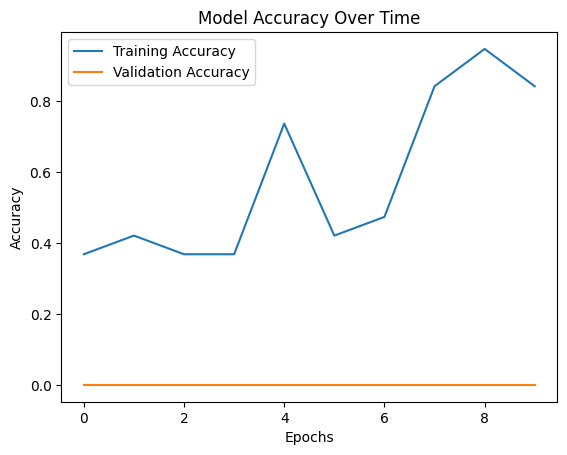

In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile

with zipfile.ZipFile("dataset_path.zip", "r") as zip_ref:
    zip_ref.extractall("/content/dataset_path")

import os
print(os.listdir("/content/dataset_path/dataset_path"))

import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

def load_data(data_dir):
    images, labels = [], []
    label_map = {"metal": 0, "organic": 1, "plastic": 2}
    for label in label_map:
        folder = os.path.join(data_dir, label)
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (64, 64))
            images.append(img)
            labels.append(label_map[label])
    images = np.array(images) / 255.0
    labels = to_categorical(labels)
    return images, labels

images, labels = load_data("/content/dataset_path/dataset_path")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(images, labels, epochs=10, validation_split=0.2)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

def predict_image(path):
    import cv2
    import numpy as np

    img = cv2.imread(path)
    if img is None:
        print(" Couldn't load image.")
        return
    img = cv2.resize(img, (64, 64)) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)[0]
    classes = ["Metal", "Organic", "Plastic"]
    for i, prob in enumerate(prediction):
        print(f"{classes[i]}: {prob:.2f}")
    print(f" Predicted Waste Type: {classes[np.argmax(prediction)]}")




In [ ]:
from google.colab import files
files.upload()



Saving Rust Pile.jpeg to Rust Pile.jpeg


{'Rust Pile.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x02\x80\x01\xe3\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x

In [ ]:
import os
print(os.listdir("/content"))


predict_image("/content/Rust Pile.jpeg")




['.config', 'Rust Pile.jpeg', 'dataset_path.zip', 'dataset_path', 'sample_data']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Metal: 0.73
Organic: 0.20
Plastic: 0.07
🔎 Predicted Waste Type: Metal
